In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Wczytanie danych
df1 = pd.read_excel('dane.xlsx', sheet_name='md_marka_nadwozie')
df2 = pd.read_excel('dane.xlsx', sheet_name='md_nadwozie_sl')
df3 = pd.read_excel('dane.xlsx', sheet_name='md_pojemnosc')
df4 = pd.read_excel('dane.xlsx', sheet_name='md_ceny')

In [20]:
# Połączenie danych do jednego DataFrame
df = pd.merge(df1, df2, on='NADW')
df = pd.merge(df, df3, on='MODEL_ID')
df = pd.merge(df, df4, on='MODEL_ID')
df

,MODEL_ID,NADW,MARKA,NADWOZIE,POJEMNOSC,ROK_MIES,CENA
0,188680,sed,SAAB,sedan,2060,2012,-107772
1,188680,sed,SAAB,sedan,2060,2011,-95742
2,188680,sed,SAAB,sedan,2060,2010,86100
3,188680,sed,SAAB,sedan,2060,2009,77400
4,188680,sed,SAAB,sedan,2060,2008,69600
...,...,...,...,...,...,...,...
15901,134494,tg,PORSCHE,targa (dach twardy demontowany),3750,2004,273900
15902,134494,tg,PORSCHE,targa (dach twardy demontowany),3750,2003,254700
15903,134494,tg,PORSCHE,targa (dach twardy demontowany),3750,2002,237000
15904,134494,tg,PORSCHE,targa (dach twardy demontowany),3750,2001,220200


In [35]:
# Zmiana nazwy kolumny w celu lepszej czytelności tabeli
df = df.rename(columns={'ROK_MIES': 'ROK_PRODUKCJI'})

In [36]:
# Sprawdzenie typów danych w poszczególnych kolumnach
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13425 entries, 0 to 15905
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MODEL_ID       13425 non-null  int64  
 1   NADW           13425 non-null  object 
 2   MARKA          13425 non-null  object 
 3   NADWOZIE       13425 non-null  object 
 4   POJEMNOSC      13425 non-null  int64  
 5   ROK_PRODUKCJI  13425 non-null  int64  
 6   CENA           13425 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 839.1+ KB


In [37]:
# Zamiana danych z kolumny 'CENA' na typ numeryczny, wartości nienumeryczne zamieniane są na NaN
df['CENA'] = pd.to_numeric(df['CENA'], errors='coerce')

In [38]:
# Sprawdzenie liczby brakujących danych w każdej z kolumn
df.isna().sum()

MODEL_ID         0
NADW             0
MARKA            0
NADWOZIE         0
POJEMNOSC        0
ROK_PRODUKCJI    0
CENA             0
dtype: int64

In [39]:
# Usinięcie wierszy z brakującymi danymi
df.dropna(inplace=True)

In [40]:
# Wybranie wierszy w których cena jest niezerowa
df = df.loc[df['CENA'] != 0]

In [41]:
# Nałożenie modułu na kolumnę 'CENA' w celu zamiany ujemnych cen na dodatnie, aby ujednolicić wartości cen
df['CENA'] = df['CENA'].apply(abs)

In [42]:
# Skrócenie nazwy nadwozia 
df.loc[df['NADWOZIE'] == 'targa (dach twardy demontowany)', 'NADWOZIE'] = 'targa'

In [43]:
df

,MODEL_ID,NADW,MARKA,NADWOZIE,POJEMNOSC,ROK_PRODUKCJI,CENA
0,188680,sed,SAAB,sedan,2060,2012,107772.0
1,188680,sed,SAAB,sedan,2060,2011,95742.0
2,188680,sed,SAAB,sedan,2060,2010,86100.0
3,188680,sed,SAAB,sedan,2060,2009,77400.0
4,188680,sed,SAAB,sedan,2060,2008,69600.0
...,...,...,...,...,...,...,...
15901,134494,tg,PORSCHE,targa,3750,2004,273900.0
15902,134494,tg,PORSCHE,targa,3750,2003,254700.0
15903,134494,tg,PORSCHE,targa,3750,2002,237000.0
15904,134494,tg,PORSCHE,targa,3750,2001,220200.0


In [44]:
# Sprawdzenie liczby zduplikowanych wierszy. Wiersze zduplikowane nie zostały usunięte, ponieważ istnieje możliwość, że sprzedaż takiego samego samochodu w tej samej cenie miała miejsce.
df.duplicated().sum()

11

In [45]:
# Sprawdzenie ile unikalnych wartości występuje w każdej z kolumn
df.nunique()

MODEL_ID         2306
NADW               11
MARKA              51
NADWOZIE           11
POJEMNOSC         251
ROK_PRODUKCJI      20
CENA             6598
dtype: int64

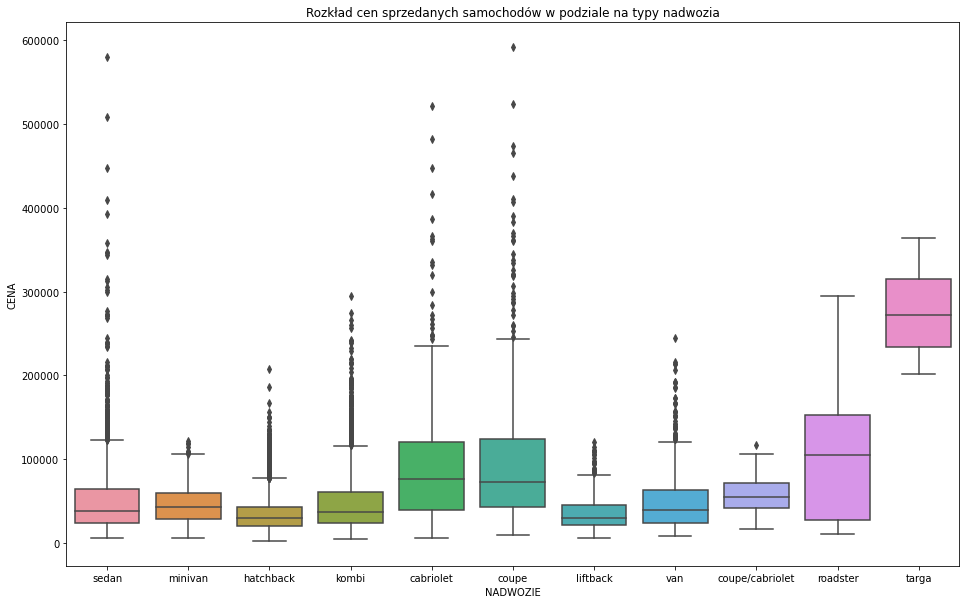

In [46]:
# Rysowanie wykresu boxplot w celu sprawdzenia rozkładu cen dla każdego typu nadwozia
plt.figure(figsize=(16,10))
sns.boxplot(data=df, x='NADWOZIE', y='CENA')
plt.title('Rozkład cen sprzedanych samochodów w podziale na typy nadwozia')
plt.show()

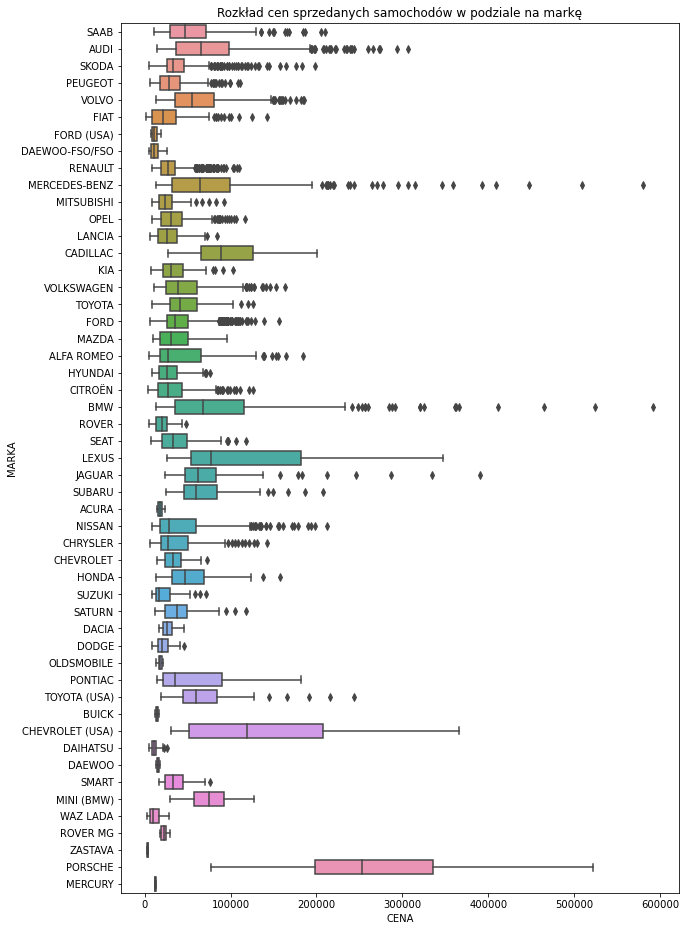

In [47]:
# Rysowanie wykresu boxplot w celu sprawdzenia rozkładu cen dla każdej z marek samochowdów 
plt.figure(figsize=(10,16))
sns.boxplot(data=df, y='MARKA', x='CENA')
plt.title('Rozkład cen sprzedanych samochodów w podziale na markę')
plt.show()

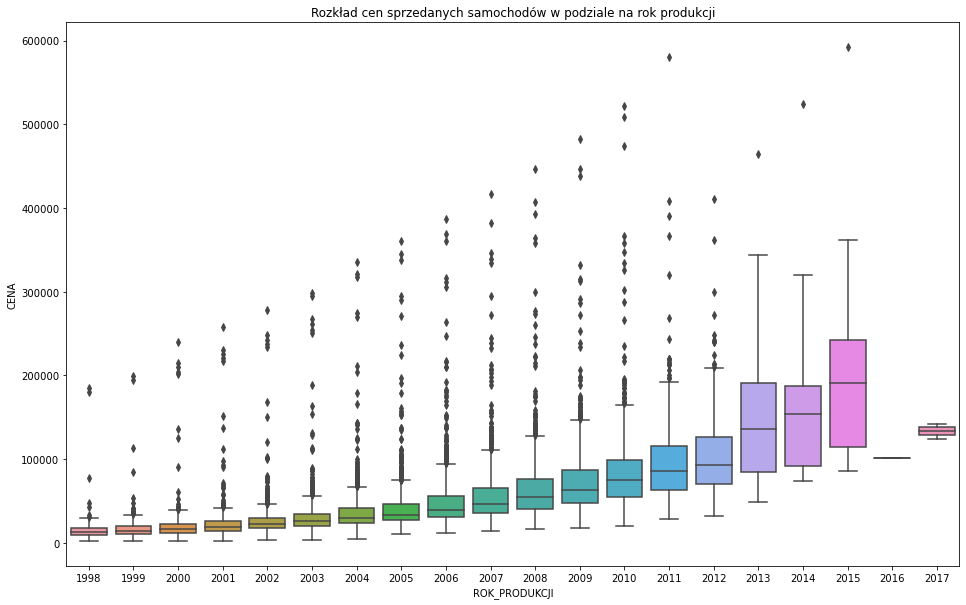

In [48]:
# Rysowanie wykresu boxplot w celu sprawdzenia rozkładu cen dla każdego roku produkcji samochodu
plt.figure(figsize=(16,10))
sns.boxplot(data=df, x='ROK_PRODUKCJI', y='CENA')
plt.title('Rozkład cen sprzedanych samochodów w podziale na rok produkcji')
plt.show()

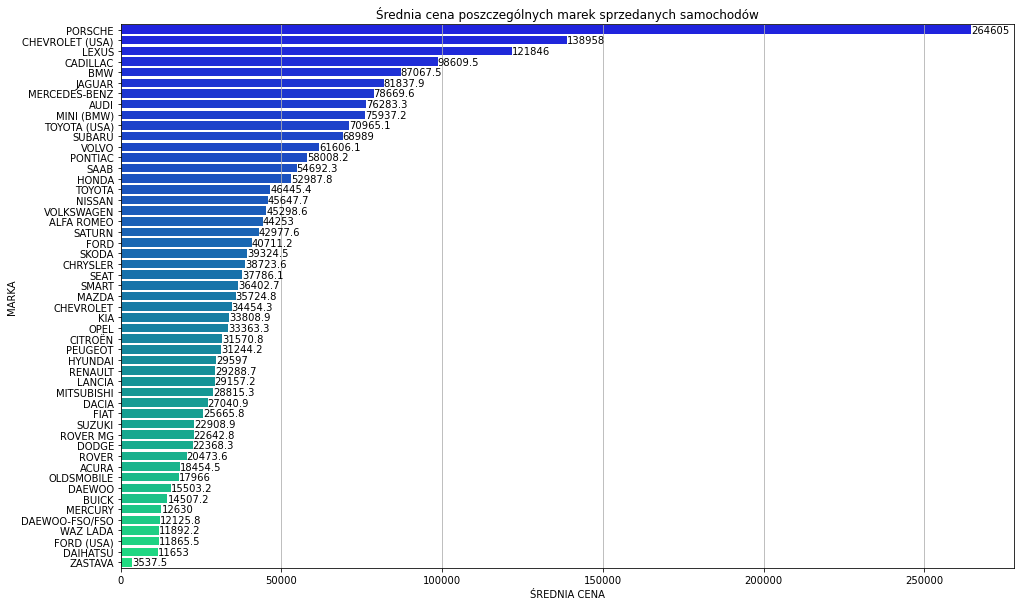

In [49]:
# Pogrupowanie danych według marek, obliczenie średniej ceny dla każdej z nich oraz posortowanie wyników malejąco według średnich cen
df_cena_marka = df.groupby('MARKA').mean()['CENA'].reset_index().sort_values('CENA', ascending=False)

# Narysowanie wykresu słupkowego 
plt.figure(figsize=(16,10))
ax = sns.barplot(x='CENA', y='MARKA', data=df_cena_marka, palette='winter')
plt.grid(axis='x')
plt.xlabel('ŚREDNIA CENA')
plt.title('Średnia cena poszczególnych marek sprzedanych samochodów')

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

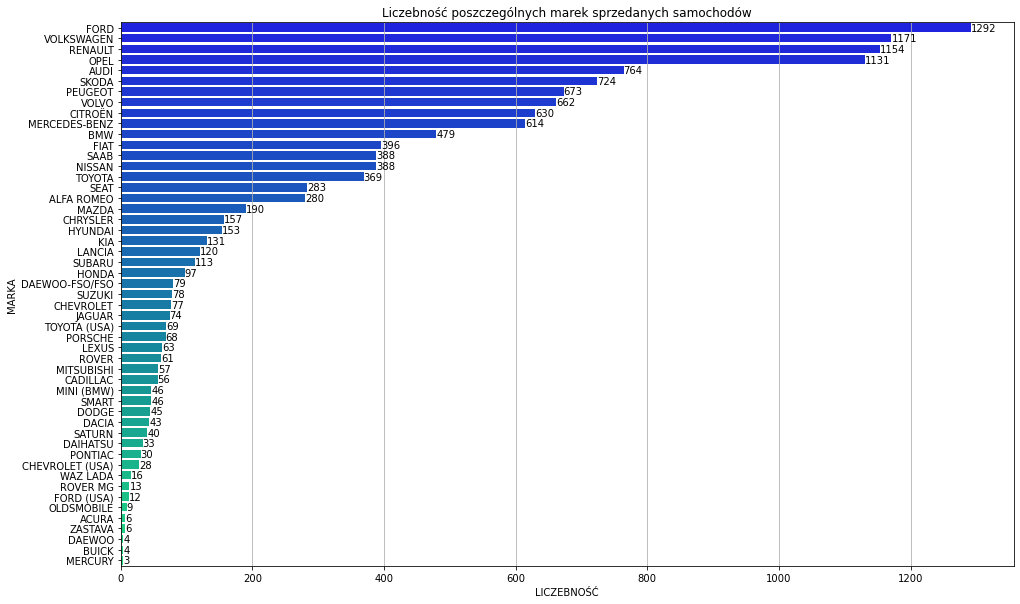

In [50]:
# Pogrupowanie danych według marek, zliczenie liczby wystąpień każdej z nich oraz posortowanie wyników malejąco według liczby wystąpień
df_count_marka = df.groupby('MARKA').count()['MODEL_ID'].reset_index().sort_values('MODEL_ID', ascending=False)
# Zmiana nazwy kolumny w celu lepszej czytelności tabeli
df_count_marka.rename(columns={'MODEL_ID': 'LICZEBNOŚĆ'}, inplace=True)

# Narysowanie wykresu słupkowego 
plt.figure(figsize=(16,10))
ax = sns.barplot(x='LICZEBNOŚĆ', y='MARKA', data=df_count_marka, palette='winter')
plt.grid(axis='x')
plt.title('Liczebność poszczególnych marek sprzedanych samochodów')

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

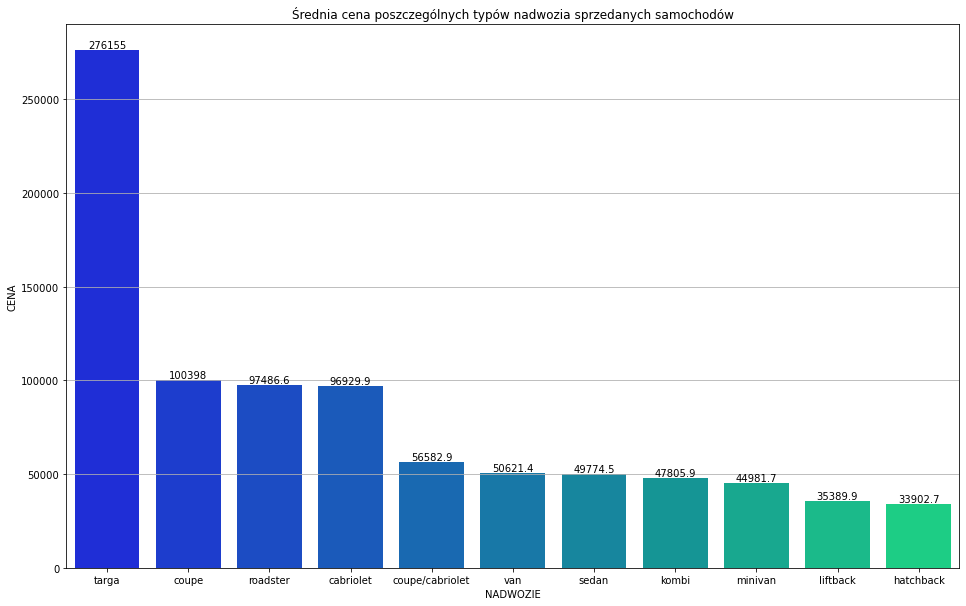

In [51]:
# Pogrupowanie danych według typów nadwozia, obliczenie średniej ceny dla każdego z nich oraz posortowanie wyników malejąco według średnich cen
df_cena_nadwozie = df.groupby('NADWOZIE').mean()['CENA'].reset_index().sort_values('CENA', ascending=False)

# Narysowanie wykresu słupkowego 
plt.figure(figsize=(16,10))
ax = sns.barplot(y='CENA', x='NADWOZIE', data=df_cena_nadwozie, palette='winter')
plt.grid(axis='y')
plt.title('Średnia cena poszczególnych typów nadwozia sprzedanych samochodów')

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

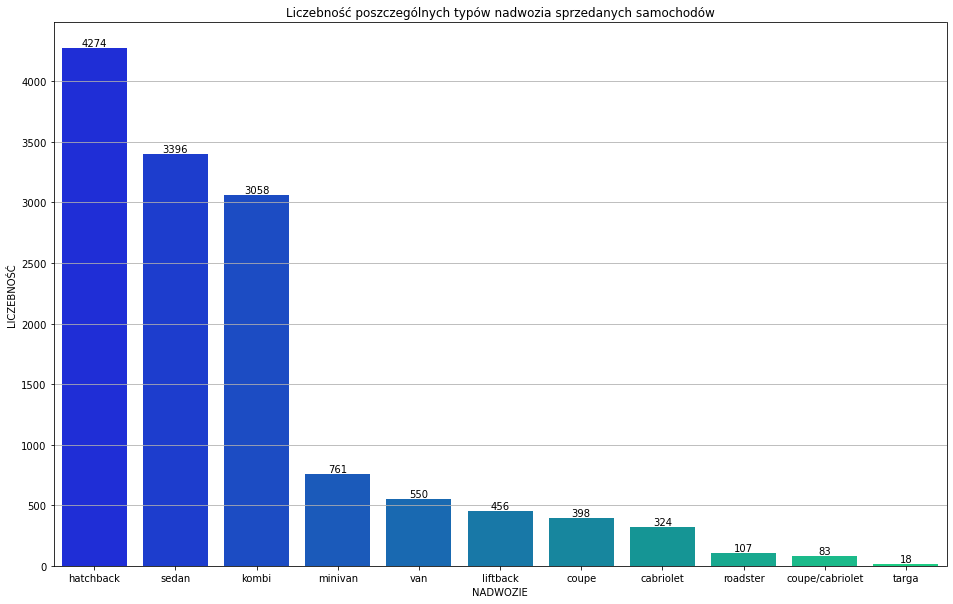

In [52]:
# Pogrupowanie danych według typów nadwozia, zliczenie liczby wystąpień każdego z nich oraz posortowanie wyników malejąco według liczby wystąpień
df_count_nadwozie = df.groupby('NADWOZIE').count()['MODEL_ID'].reset_index().sort_values('MODEL_ID', ascending=False)
# Zmiana nazwy kolumny w celu lepszej czytelności tabeli
df_count_nadwozie.rename(columns={'MODEL_ID': 'LICZEBNOŚĆ'}, inplace=True)

# Narysowanie wykresu słupkowego 
plt.figure(figsize=(16,10))
ax = sns.barplot(y='LICZEBNOŚĆ', x='NADWOZIE', data=df_count_nadwozie, palette='winter')
plt.grid(axis='y')
plt.title('Liczebność poszczególnych typów nadwozia sprzedanych samochodów')

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

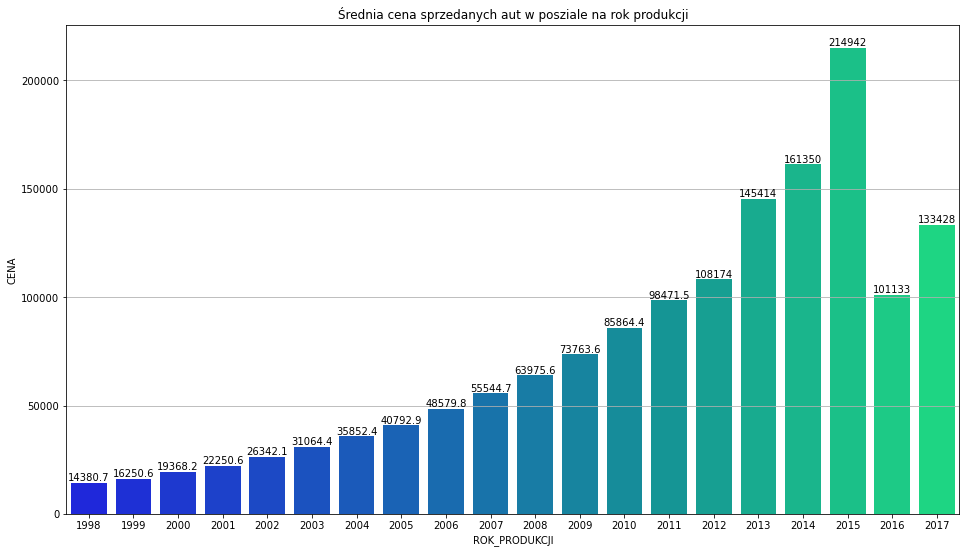

In [57]:
# Pogrupowanie danych według typów roku produkcji, obliczenie średniej ceny dla każdego z nich
df_cena_rok = df.groupby('ROK_PRODUKCJI').mean()['CENA'].reset_index()

# Narysowanie wykresu słupkowego 
plt.figure(figsize=(16,9))
ax = sns.barplot(x='ROK_PRODUKCJI', y='CENA', data=df_cena_rok, palette='winter')
plt.grid(axis='y')
plt.title('Średnia cena sprzedanych aut w posziale na rok produkcji')

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

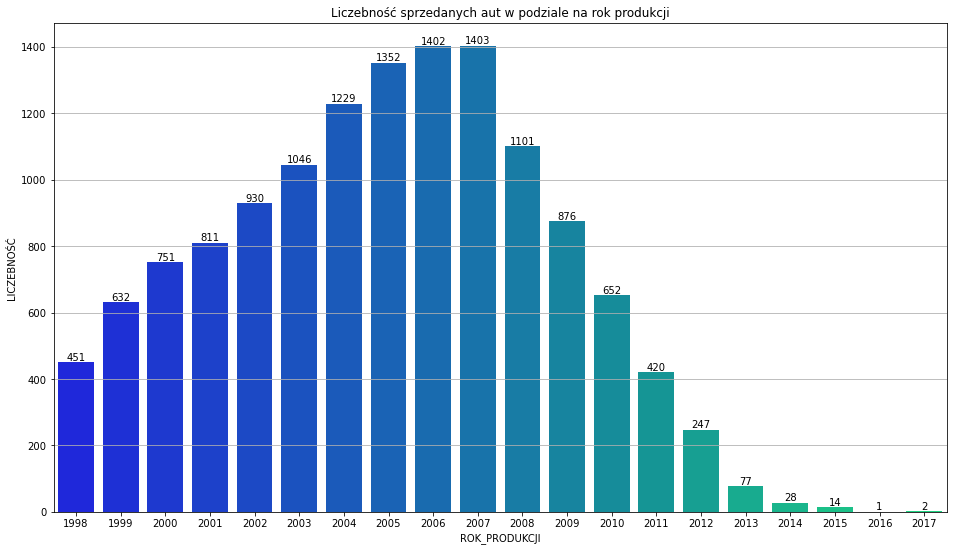

In [58]:
# Pogrupowanie danych według roku produkcji, zliczenie liczby wystąpień każdego z nich
df_count_rok = df.groupby('ROK_PRODUKCJI').count()['MODEL_ID'].reset_index()
# Zmiana nazwy kolumny w celu lepszej czytelności tabeli
df_count_rok.rename(columns={'MODEL_ID': 'LICZEBNOŚĆ'}, inplace=True)

# Narysowanie wykresu słupkowego
plt.figure(figsize=(16,9))
ax = sns.barplot(x='ROK_PRODUKCJI', y='LICZEBNOŚĆ', data=df_count_rok, palette='winter')
plt.grid(axis='y')
plt.title('Liczebność sprzedanych aut w podziale na rok produkcji')

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

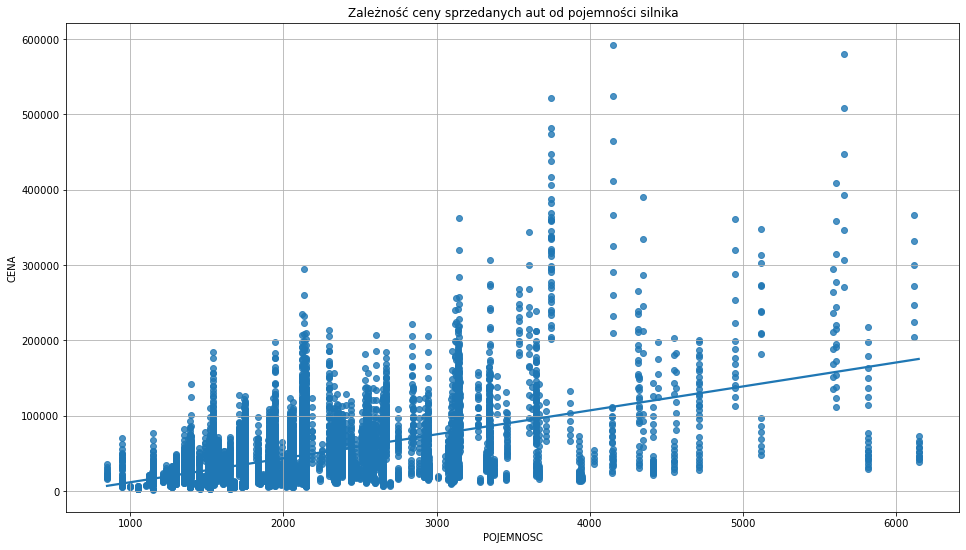

In [62]:
# Narysowanie wykresu punktowego z prostą regresji (cena od pojemności)
plt.figure(figsize=(16,9))
ax = sns.regplot(x='POJEMNOSC', y='CENA', data=df, ci=None)
plt.grid()
plt.title('Zależność ceny sprzedanych aut od pojemności silnika')
plt.show()

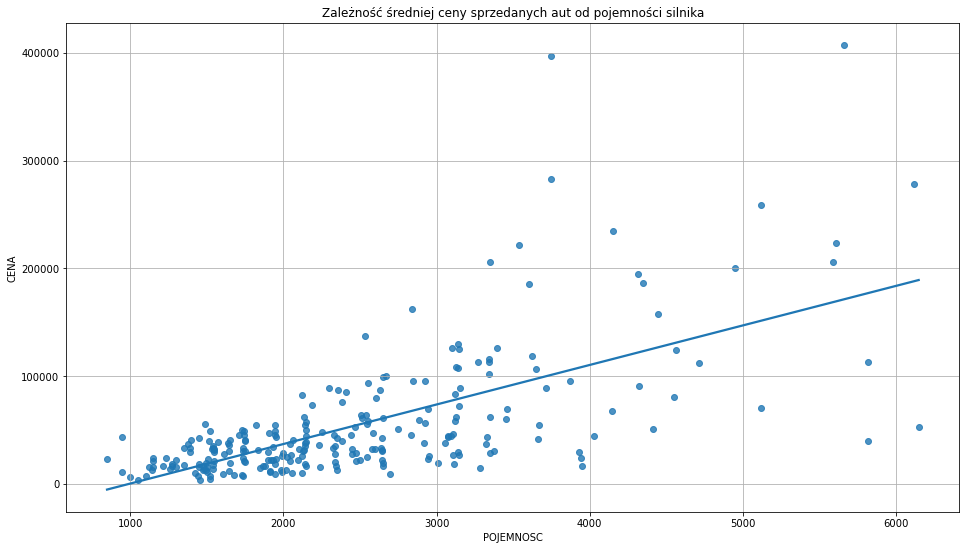

In [63]:
# Pogrupowanie danych według pojemności silnika, obliczenie średniej ceny dla każdej z nich
df_cena_pojemnosc = df.groupby('POJEMNOSC').mean()['CENA'].reset_index()

# Narysowanie wykresu punktowego z prostą regresji
plt.figure(figsize=(16,9))
ax = sns.regplot(x='POJEMNOSC', y='CENA', data=df_cena_pojemnosc, ci=None)
plt.grid()
plt.title('Zależność średniej ceny sprzedanych aut od pojemności silnika')
plt.show()

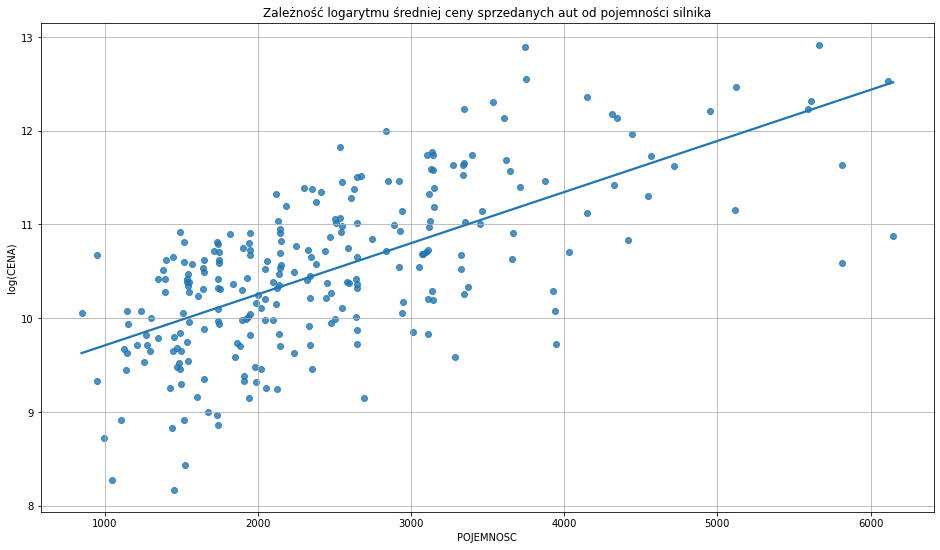

In [64]:
# Pogrupowanie danych według pojemności silnika, obliczenie średniej ceny dla każdej z nich
df_cena_pojemnosc = df.groupby('POJEMNOSC').mean()['CENA'].reset_index()
# Dodanie kolumny w której jest logarytm ze średniej ceny dla każdej z pojemności
df_cena_pojemnosc['log(CENA)'] = df_cena_pojemnosc['CENA'].apply(np.log)

# Narysowanie wykresu punktowego z prostą regresji
plt.figure(figsize=(16,9))
ax = sns.regplot(x='POJEMNOSC', y='log(CENA)', data=df_cena_pojemnosc, ci=None)
plt.grid()
plt.title('Zależność logarytmu średniej ceny sprzedanych aut od pojemności silnika')
plt.show()

# Relacja między pojemnością silnika a logarytmem ceny jest bardziej zbliżona do liniowej

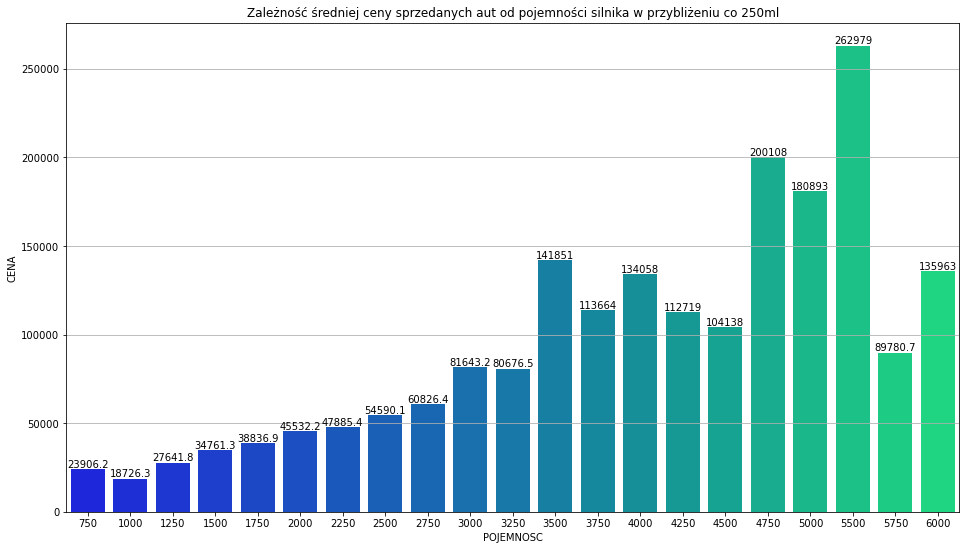

In [65]:
# Stworzenie pomocniczego DataFrame, w którym pojemność została zastąpiona przybliżeniem do najbliższej wielokrotności 250 w dół
df_pom = df.copy()
df_pom['POJEMNOSC'] = (df_pom['POJEMNOSC'] // 250) * 250

# Pogrupowanie danych według przybliżonej pojemności silnika, obliczenie średniej ceny dla każdej z nich
df_cena_pojemnosc = df_pom.groupby('POJEMNOSC').mean()['CENA'].reset_index()

# Narysowanie wykresu słupkowego
plt.figure(figsize=(16,9))
ax = sns.barplot(x='POJEMNOSC', y='CENA', data=df_cena_pojemnosc, palette='winter')
plt.grid(axis='y')
plt.title('Zależność średniej ceny sprzedanych aut od pojemności silnika w przybliżeniu co 250ml')

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

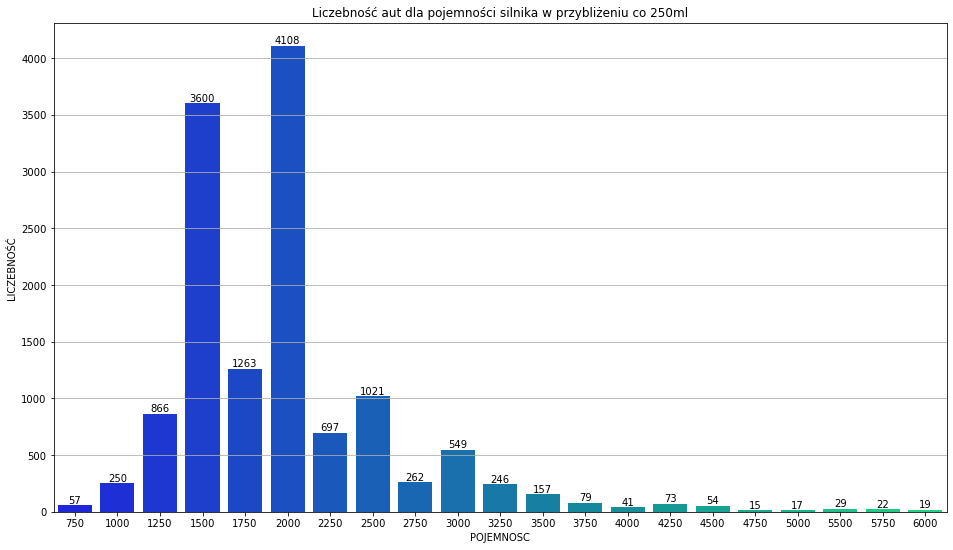

In [66]:
# Stworzenie pomocniczego DataFrame, w którym pojemność została zastąpiona przybliżeniem do najbliższej wielokrotności 250 w dół
df_pom = df.copy()
df_pom['POJEMNOSC'] = (df_pom['POJEMNOSC'] // 250) * 250

# Pogrupowanie danych według przybliżonej pojemności, zliczenie liczby wystąpień każdej z nich
df_count_pojemnosc = df_pom.groupby('POJEMNOSC').count()['MODEL_ID'].reset_index()
# Zmiana nazwy kolumny w celu lepszej czytelności tabeli
df_count_pojemnosc.rename(columns={'MODEL_ID': 'LICZEBNOŚĆ'}, inplace=True)

# Narysowanie wykresu słupkowego
plt.figure(figsize=(16,9))
ax = sns.barplot(x='POJEMNOSC', y='LICZEBNOŚĆ', data=df_count_pojemnosc, palette='winter')
plt.grid(axis='y')
plt.title('Liczebność aut dla pojemności silnika w przybliżeniu co 250ml')

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

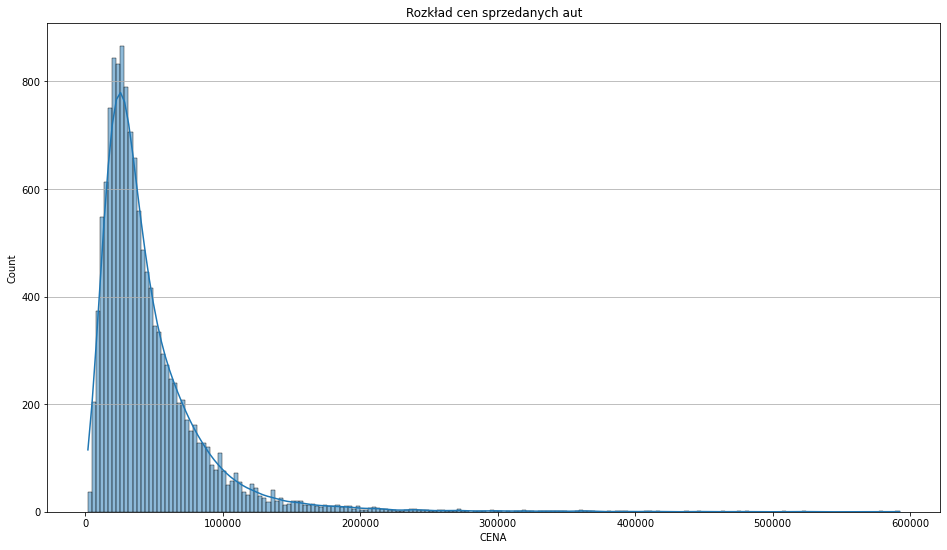

In [67]:
# Narysowanie histogramu cen
plt.figure(figsize=(16,9))
sns.histplot(data=df, x='CENA', kde=True)
plt.grid(axis='y')
plt.title('Rozkład cen sprzedanych aut')
plt.show()

In [74]:
# Tworzenie modelu regresyjnego lasu losowego
# Model regresyjnego lasu losowego został wybrany, ponieważ dane zawierają tylko jedną kolumnę numeryczną, a trzy kolumny kategoryczne. Ten model dobrze radzi sobie zarówno ze zmiennymi kategorycznymi, jak i numerycznymi

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [76]:
# Wybieranie kolumn 'NADW', 'MARKA', 'POJEMNOSC', 'ROK_MIES' jako cechy X
X = df[['NADW', 'MARKA', 'POJEMNOSC', 'ROK_PRODUKCJI']]

# Wybieranie kolumny 'CENA' jako zmienna docelowa y
y = df['CENA']

# Kodowanie zmiennych kategorycznych 
X = pd.get_dummies(X, drop_first=True)

In [77]:
# Podzielenie danych na zbiory treningowy (67%) i testowy (33%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [78]:
# Stworzenie modelu
regr = RandomForestRegressor()
# Dopasowanie modelu do danych treningowych X_train i y_train
regr.fit(X_train, y_train)

RandomForestRegressor()

In [79]:
# Przewidywanie wartości docelowych dla danych treningowych X_train
y_pred = regr.predict(X_train)
# Obliczanie współczynnika determinacji (R^2) między przewidywanymi a rzeczywistymi wartościami docelowymi na danych treningowych
print('R2:', r2_score(y_pred, y_train))
# Obliczanie błędu średniokwadratowego (MSE) między przewidywanymi a rzeczywistymi wartościami docelowymi na danych treningowych
print('MSE:', np.sqrt(mean_squared_error(y_pred, y_train)))

R2: 0.9833984429990915
MSE: 5378.262219514542


In [80]:
# Przewidywanie wartości docelowych dla danych testowych X_test
y_pred = regr.predict(X_test)
# Obliczanie współczynnika determinacji (R^2) między przewidywanymi a rzeczywistymi wartościami docelowymi na danych testowych
print('R2:', r2_score(y_pred, y_test))
# Obliczanie błędu średniokwadratowego (MSE) między przewidywanymi a rzeczywistymi wartościami docelowymi na danych testowych
print('MSE:', np.sqrt(mean_squared_error(y_pred, y_test)))

R2: 0.9220414917999815
MSE: 10554.64909813415


In [81]:
# Model bardzo bobrze dopasował siędo danych. Wyjaśnia dane treningowe w 98%, a dane testowe w 92%. 

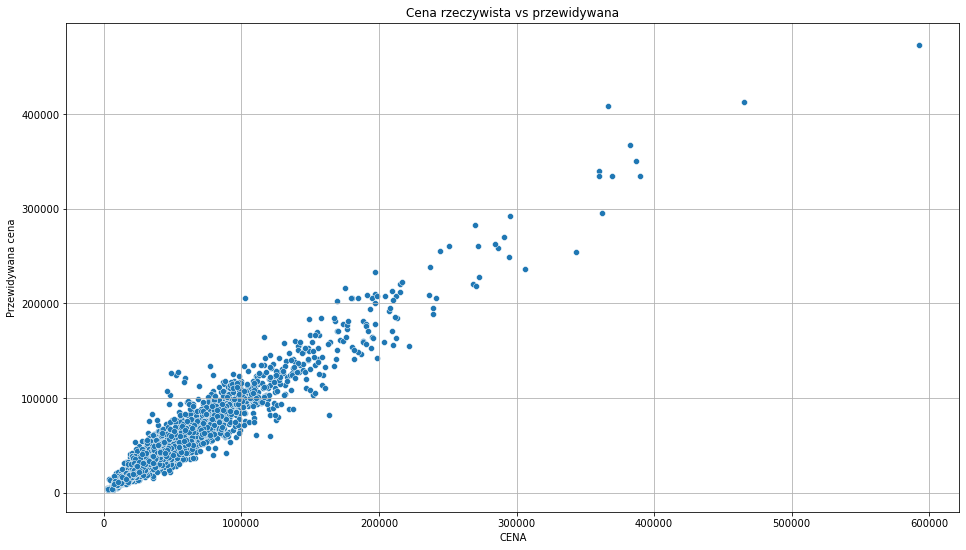

In [82]:
# Narysowanie wykresu punktowego między ceną z danych testowych, a przewidywaną ceną
plt.figure(figsize=(16,9))
sns.scatterplot(x=y_test, y=y_pred)
plt.ylabel('Przewidywana cena')
plt.grid()
plt.title('Cena rzeczywista vs przewidywana')

plt.show()

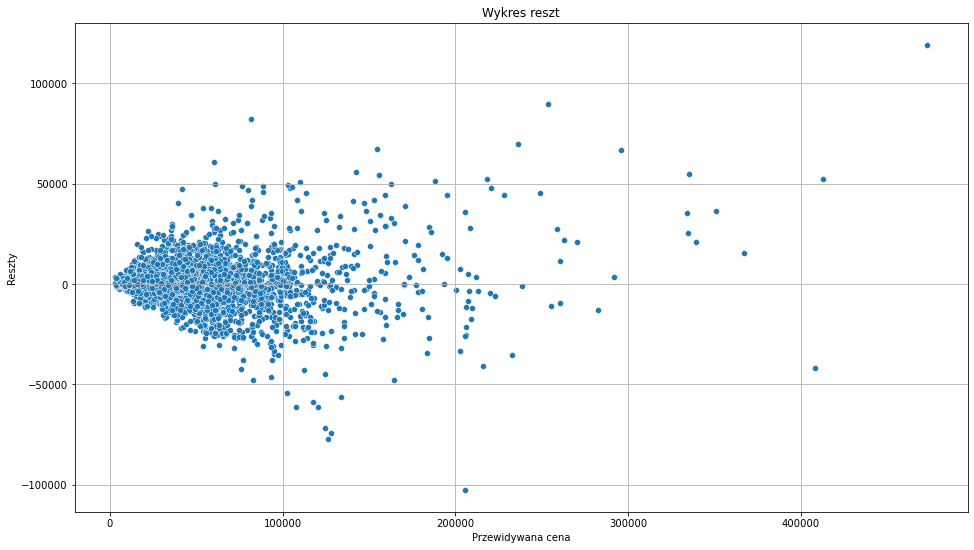

In [83]:
# Narysowanie wykresu reszt przewidywania modelu

res = y_test - y_pred

plt.figure(figsize=(16,9))
sns.scatterplot(x=y_pred, y=res)
plt.xlabel('Przewidywana cena')
plt.ylabel('Reszty')
plt.grid()
plt.title('Wykres reszt')

plt.show()

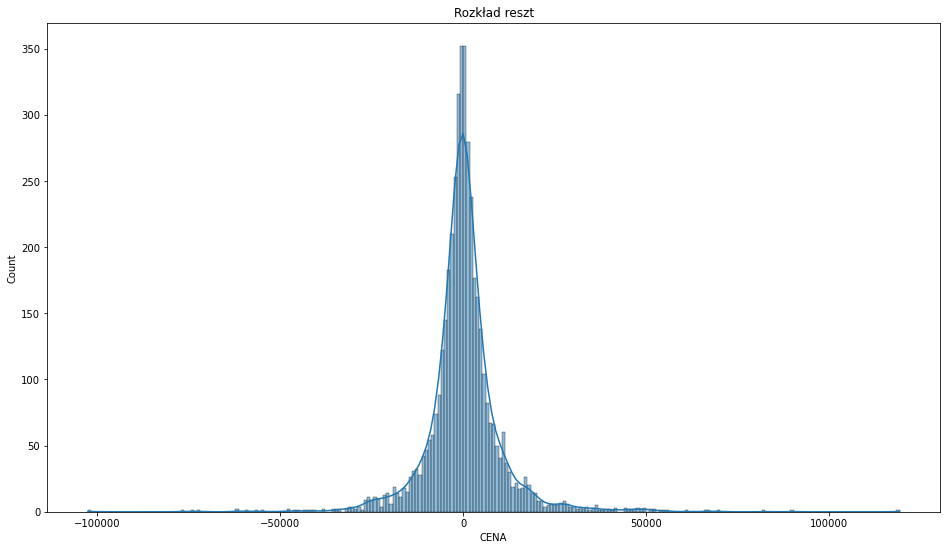

In [84]:
# Histogram rozkładu reszt 
plt.figure(figsize=(16,9))
sns.histplot(res, kde=True)
plt.title('Rozkład reszt')
plt.show()

In [85]:
# stworzenie DataFramu z danymi testowymi
df_test = df.loc[X_test.index]
# dodanie kolumn z przewidywaną ceną i różnicą ceny realnej od ceny przewidywanej
df_test['Przewidziana cena'] = y_pred
df_test['Roznica'] = df_test['CENA'] - df_test['Przewidziana cena']

In [86]:
df_test

,MODEL_ID,NADW,MARKA,NADWOZIE,POJEMNOSC,ROK_PRODUKCJI,CENA,Przewidziana cena,Roznica
15681,41150,van,MERCEDES-BENZ,van,2942,1999,28650.0,26089.875000,2560.125000
4197,145164,m.van,OPEL,minivan,1514,2002,25785.0,20255.661250,5529.338750
11293,61514,kb,ALFA ROMEO,kombi,2642,1999,11985.0,12351.840000,-366.840000
13186,160620,kb,OPEL,kombi,1398,2010,52800.0,52492.072500,307.927500
11622,52140,kb,SEAT,kombi,1540,1999,13650.0,12571.833500,1078.166500
...,...,...,...,...,...,...,...,...,...
7970,200242,hb,AUDI,hatchback,1745,2008,72900.0,62500.332500,10399.667500
8425,164022,hb,RENAULT,hatchback,2148,2006,36000.0,30927.608762,5072.391238
12420,61886,kb,TOYOTA,kombi,2145,2000,25341.0,21452.381429,3888.618571
1445,176942,sed,CADILLAC,sedan,4715,2007,126300.0,107085.289429,19214.710571


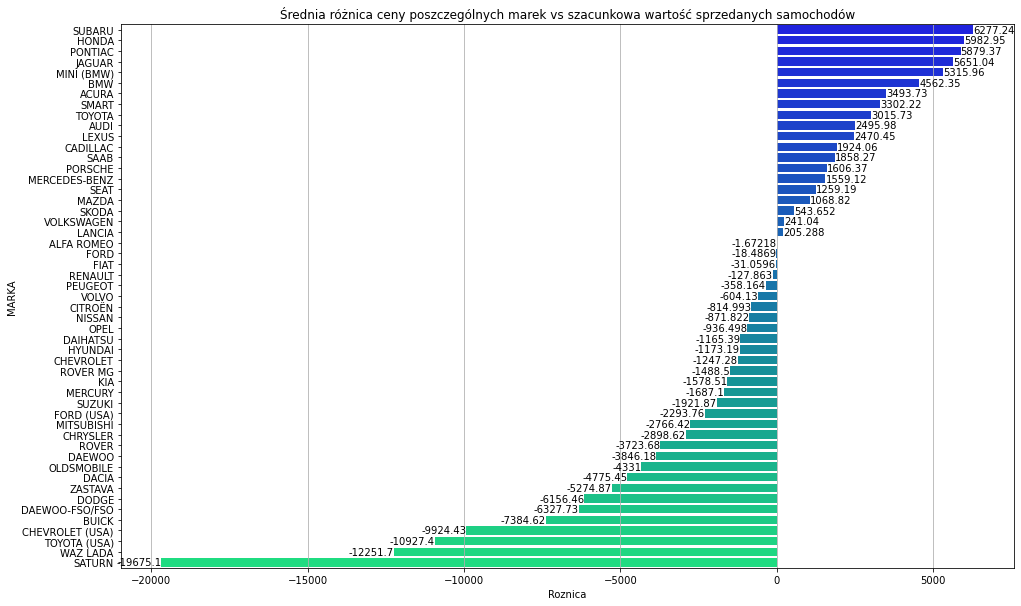

In [87]:
# Policzenie średnich różnic cen dla każdej z marek
df_roznica_marka = df_test.groupby('MARKA').mean()['Roznica'].reset_index().sort_values('Roznica', ascending=False)

# Narysowanie wykresu słupkowego
plt.figure(figsize=(16,10))
ax = sns.barplot(x='Roznica', y='MARKA', data=df_roznica_marka, palette='winter')
plt.grid(axis='x')
plt.title('Średnia różnica ceny poszczególnych marek vs szacunkowa wartość sprzedanych samochodów')

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

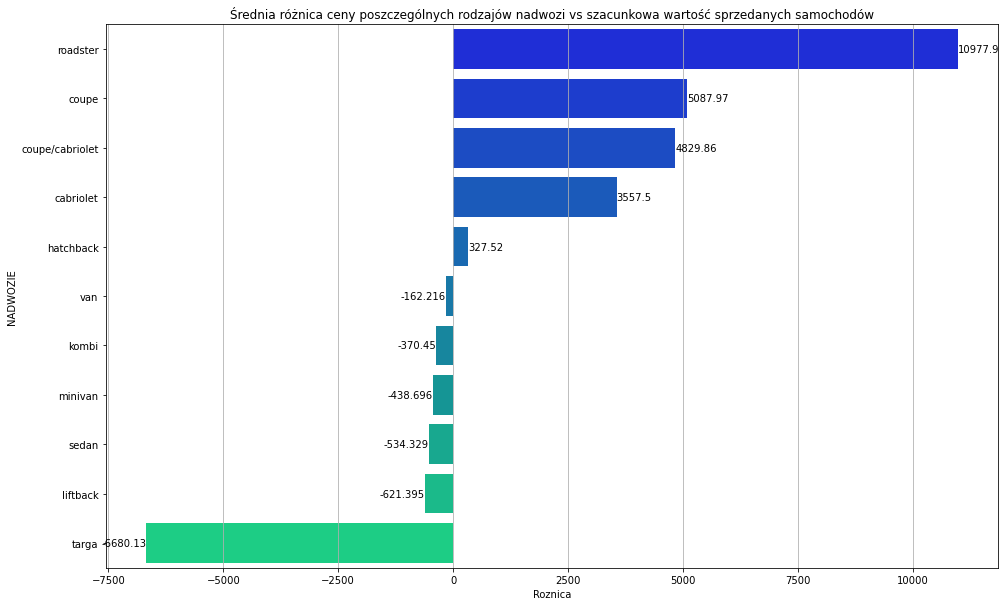

In [88]:
# Policzenie średnich różnic cen dla każdego z typu nadwozi
df_roznica_nadwozie = df_test.groupby('NADWOZIE').mean()['Roznica'].reset_index().sort_values('Roznica', ascending=False)

# Narysowanie wykresu słupkowego
plt.figure(figsize=(16,10))
ax = sns.barplot(x='Roznica', y='NADWOZIE', data=df_roznica_nadwozie, palette='winter')
plt.grid(axis='x')
plt.title('Średnia różnica ceny poszczególnych rodzajów nadwozi vs szacunkowa wartość sprzedanych samochodów')

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

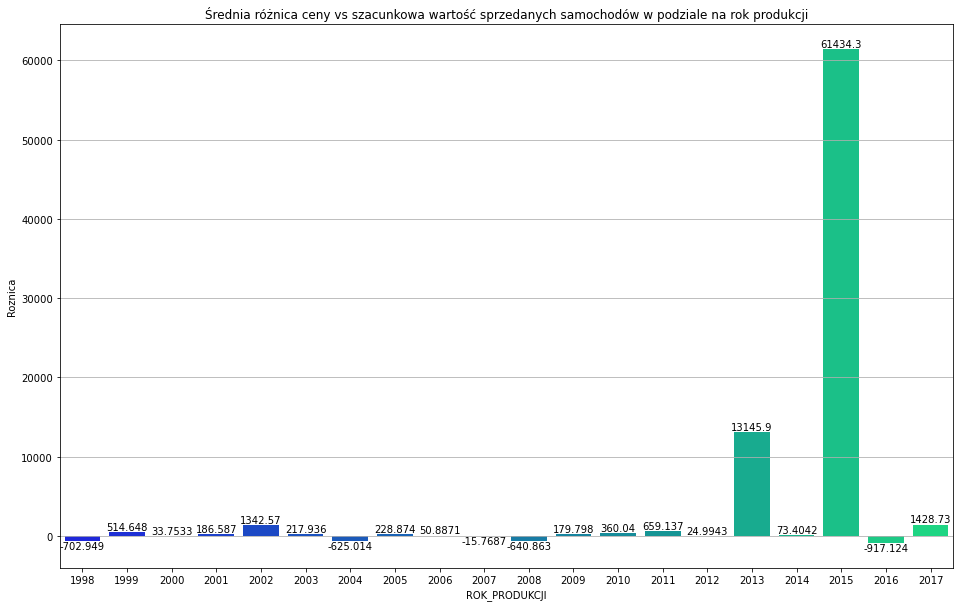

In [90]:
# Policzenie średnich różnic cen dla każdego roku produkcji
df_roznica_nadwozie = df_test.groupby('ROK_PRODUKCJI').mean()['Roznica'].reset_index()

# Narysowanie wykresu słupkowego
plt.figure(figsize=(16,10))
ax = sns.barplot(x='ROK_PRODUKCJI', y='Roznica', data=df_roznica_nadwozie, palette='winter')
plt.grid(axis='y')
plt.title('Średnia różnica ceny vs szacunkowa wartość sprzedanych samochodów w podziale na rok produkcji')

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

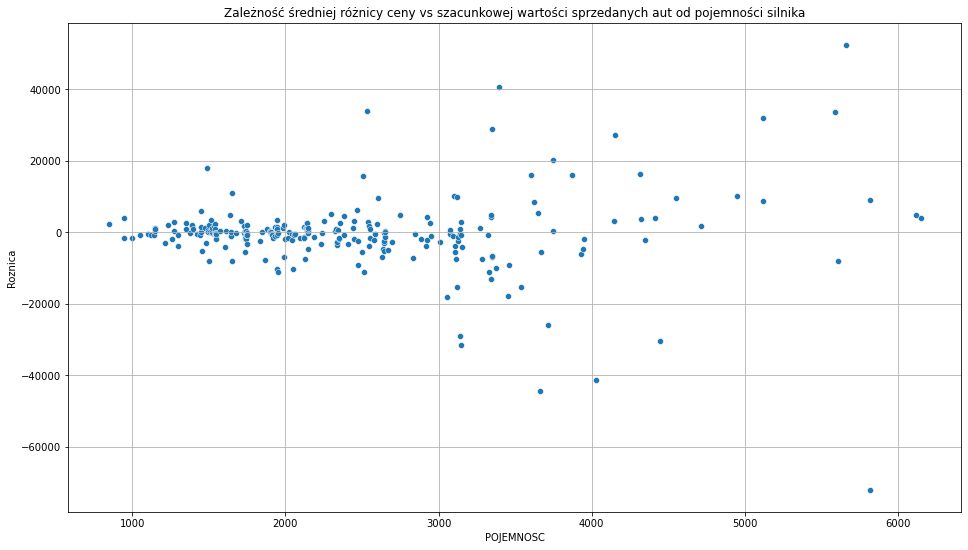

In [91]:
# Policzenie średnich różnic cen dla każdej z pojemności
df_roznica_pojemnosc = df_test.groupby('POJEMNOSC').mean()['Roznica'].reset_index()

# Narysowanie wykresu punktowego
plt.figure(figsize=(16,9))
ax = sns.scatterplot(x='POJEMNOSC', y='Roznica', data=df_roznica_pojemnosc)
plt.grid()
plt.title('Zależność średniej różnicy ceny vs szacunkowej wartości sprzedanych aut od pojemności silnika')
plt.show()

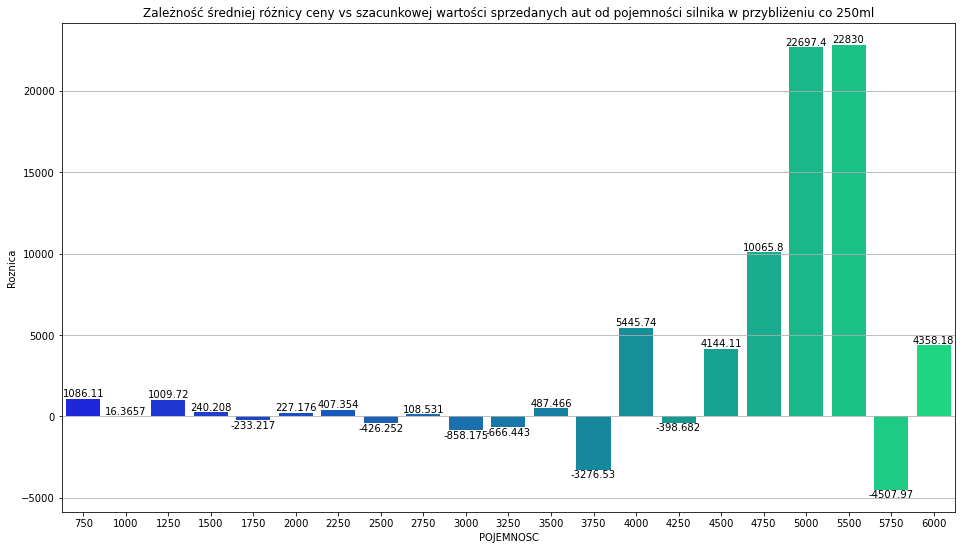

In [92]:
# Stworzenie pomocniczego DataFrame, w którym pojemność została zastąpiona przybliżeniem do najbliższej wielokrotności 250 w dół
df_pom = df_test.copy()
df_pom['POJEMNOSC'] = (df_pom['POJEMNOSC'] // 250) * 250

# Policzenie średnich różnic cen dla każdej z przybliżonych pojemności
df_roznica_pojemnosc = df_pom.groupby('POJEMNOSC').mean()['Roznica'].reset_index()

# Narysowanie wykresu słupkowego
plt.figure(figsize=(16,9))
ax = sns.barplot(x='POJEMNOSC', y='Roznica', data=df_roznica_pojemnosc, palette='winter')
plt.grid(axis='y')
plt.title('Zależność średniej różnicy ceny vs szacunkowej wartości sprzedanych aut od pojemności silnika w przybliżeniu co 250ml')

for i in ax.containers:
    ax.bar_label(i,)
plt.show()